In [4]:
import pandas as pd
import gseapy as gp
import numpy as np
import matplotlib.pyplot as plt
from pyensembl import EnsemblRelease

In [2]:
#!pyensembl install --release 108 --species homo_sapiens

In [6]:
EnsemblRelease(108).transcript_ids_of_gene_name('MIR5692A2')

['ENST00000582551']

In [22]:
gene_list_up =[]
gene_list_down =[]
data = pd.read_csv("Transcriptomic/all_de_j2_vs_j0_allgenes.txt", sep='\t')
data = pd.DataFrame.dropna(data)

for i,j in enumerate(data["symbol"]):
    if (data.iloc[i,2] > 1) & (data.iloc[i,5] < 0.05):
        gene_list_up.append(j)
    elif (data.iloc[i,2] < -1) & (data.iloc[i,5] < 0.05):
        gene_list_down.append(j)
    else :
        continue
print(len(gene_list_up))
print(len(gene_list_down))

769
212


In [24]:
enrichment_up = gp.enrichr(gene_list=gene_list_up,
                 gene_sets=['KEGG_2021_Human'],
                 organism='human',
                 outdir=None,
                )
enrichment_down = gp.enrichr(gene_list=gene_list_down,
                 gene_sets=['KEGG_2021_Human'],
                 organism='human',
                 outdir=None,
                )

INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Analysis name: , Enrichr Library: KEGG_2021_Human
INFO:gseapy:Connecting to Enrichr Server to get latest library names
INFO:gseapy:Analysis name: , Enrichr Library: KEGG_2021_Human


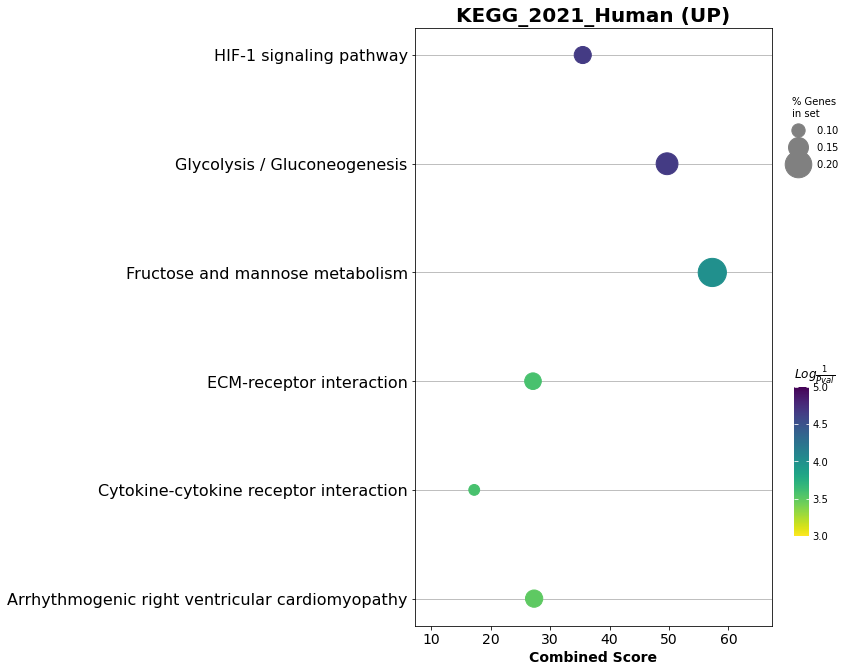

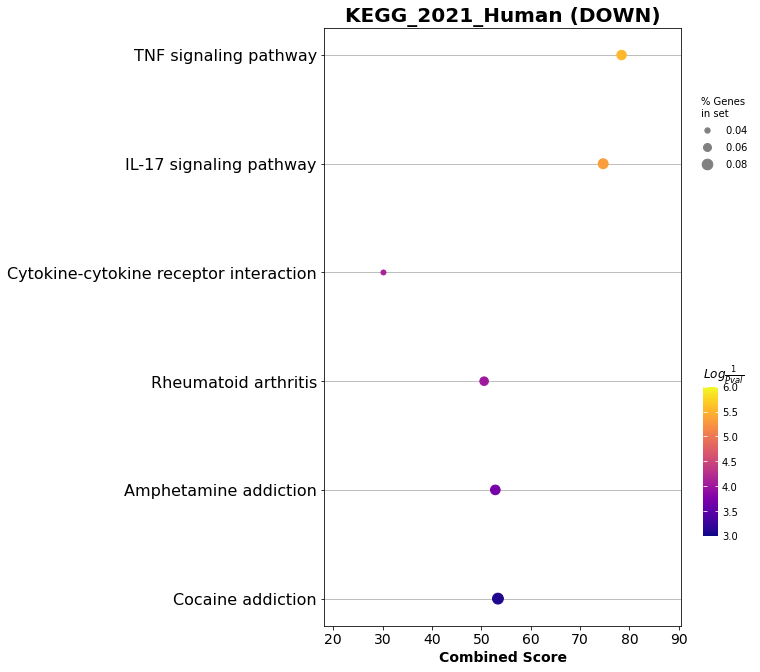

In [27]:
from gseapy import barplot, dotplot
ax = dotplot(enrichment_up.res2d, title='KEGG_2021_Human (UP)',cmap='viridis_r', size=50, figsize=(8,11))
ax = dotplot(enrichment_down.res2d, title='KEGG_2021_Human (DOWN)',cmap='plasma', size=50, figsize=(8,11))

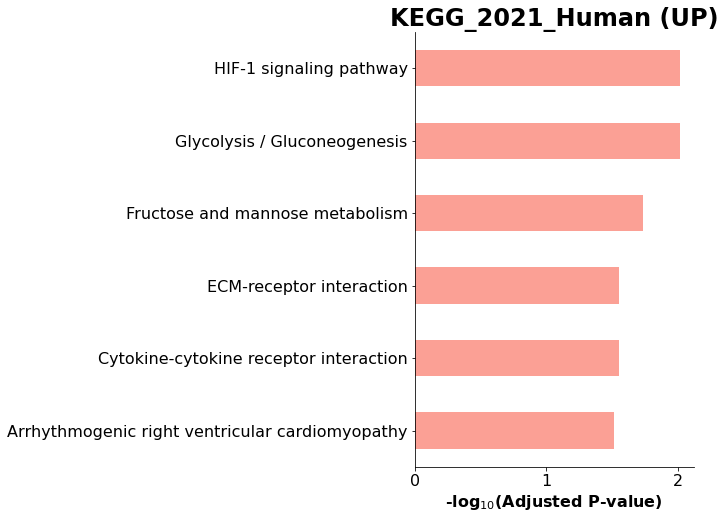

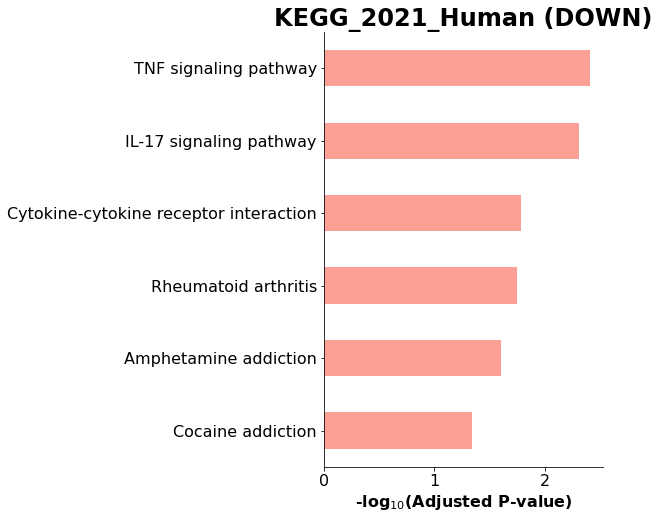

In [26]:
ax = barplot(enrichment_up.res2d,title='KEGG_2021_Human (UP)', figsize=(5, 8))
ax = barplot(enrichment_down.res2d,title='KEGG_2021_Human (DOWN)', figsize=(5, 8))